<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Рассчет-эффективности" data-toc-modified-id="Рассчет-эффективности-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Рассчет эффективности</a></span></li><li><span><a href="#Признаки-тестовой-выборки" data-toc-modified-id="Признаки-тестовой-выборки-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Признаки тестовой выборки</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Попробуем-протестировать-модель-на-разных-выборках:-с-удаленными-пропусками,-и-заполнеными-на-основе-предыдущих-значений" data-toc-modified-id="Попробуем-протестировать-модель-на-разных-выборках:-с-удаленными-пропусками,-и-заполнеными-на-основе-предыдущих-значений-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Попробуем протестировать модель на разных выборках: с удаленными пропусками, и заполнеными на основе предыдущих значений</a></span></li><li><span><a href="#Проверим-на-явные-дубликаты" data-toc-modified-id="Проверим-на-явные-дубликаты-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Проверим на явные дубликаты</a></span></li></ul></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Концентрация-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки" data-toc-modified-id="Концентрация-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Концентрация металлов (Au, Ag, Pb) на различных этапах очистки</a></span></li><li><span><a href="#Распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках" data-toc-modified-id="Распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Распределения размеров гранул сырья на обучающей и тестовой выборках</a></span></li><li><span><a href="#Суммарная-концентрация-всех-веществ-на-разных-стадиях:-в-сырье,-в-черновом-и-финальном-концентратах" data-toc-modified-id="Суммарная-концентрация-всех-веществ-на-разных-стадиях:-в-сырье,-в-черновом-и-финальном-концентратах-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Суммарная концентрация всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Функция-подсчета-итоговой-sMAPE" data-toc-modified-id="Функция-подсчета-итоговой-sMAPE-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Функция подсчета итоговой sMAPE</a></span></li><li><span><a href="#Обучение-моделей-на-выборках-с-удаленными-пропусками-и-заполненными" data-toc-modified-id="Обучение-моделей-на-выборках-с-удаленными-пропусками-и-заполненными-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обучение моделей на выборках с удаленными пропусками и заполненными</a></span><ul class="toc-item"><li><span><a href="#Пропуски-удалены" data-toc-modified-id="Пропуски-удалены-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Пропуски удалены</a></span></li><li><span><a href="#Пропуски-заполнены" data-toc-modified-id="Пропуски-заполнены-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Пропуски заполнены</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Тестирование модели</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

## Подготовка данных

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
train_df = pd.read_csv('gold_recovery_train_new.csv')  # тренировочная выборка
test_df = pd.read_csv('gold_recovery_test_new.csv')  # тестовая выборка
full_df = pd.read_csv('gold_recovery_full_new.csv')  # полная выборка

**Тренировочная выборка**

In [4]:
train_df.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [6]:
train_df.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,14148.000000,14148.000000,13938.000000,14149.000000,14149.000000,14149.000000,14049.000000,14144.000000,14149.000000,14129.000000,...,14143.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14147.000000,14148.000000
mean,5.142034,10.132960,9.202849,44.003792,66.518832,9.607035,2.597298,10.512122,2.918421,133.320659,...,19.985454,-478.696836,15.487065,-460.229416,16.775136,-483.956022,13.064590,-483.966564,19.577539,-506.798480
std,1.369586,1.654930,2.790516,4.905261,10.295402,2.319069,0.971843,3.003617,0.903712,39.431659,...,5.657723,50.736021,5.255655,58.843586,5.831906,37.892788,5.765617,39.207913,5.764417,37.079249
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.709069,0.000000,-799.889113,-0.372054,-797.142475,0.646208,-800.006180,0.195324,-809.398668
25%,4.211620,9.297355,7.484645,43.276111,62.545817,7.997429,1.905973,8.811324,2.368607,107.006651,...,14.990775,-500.628656,11.894558,-500.149000,11.083980,-500.363177,8.994405,-500.105994,14.989304,-500.745104
50%,4.994652,10.297144,8.845462,44.872436,67.432775,9.480270,2.592022,10.514621,2.851025,133.018328,...,20.001789,-499.681450,14.975536,-499.388738,17.932223,-499.702452,11.997547,-499.914556,19.984175,-500.061431
75%,5.859540,11.170603,10.487508,46.166425,72.346428,11.003707,3.241723,11.933009,3.434764,159.825396,...,24.990826,-477.472413,20.059375,-400.039008,21.346550,-487.712108,17.982903,-453.186936,24.991623,-499.536466
max,16.001945,17.031899,18.124851,52.756638,100.000000,19.552149,5.639565,22.317730,8.197408,250.127834,...,30.115735,-245.239184,24.007913,-145.071088,43.709931,-275.073125,27.926001,-157.396071,32.188906,-104.427459


**Тестовая выборка**

In [7]:
test_df.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [9]:
test_df.describe()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5286.000000,5285.000000,5290.000000,5286.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,...,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000
mean,174.839652,8.683596,7.266339,1.383803,1.539494e+03,-497.665883,1.545174e+03,-500.273098,1.527272e+03,-498.330680,...,1.632007e+01,-505.144570,1.373544e+01,-463.349858,12.804186,-501.329122,9.881145,-495.663398,17.304935,-501.793193
std,43.027080,3.072050,0.610219,0.643474,1.167979e+02,19.952431,1.222246e+02,32.968307,1.225380e+02,21.964876,...,3.493583e+00,31.427337,3.430484e+00,86.189107,3.026591,17.951495,2.868205,34.535007,4.536544,39.044215
min,2.566156,0.003839,5.650000,0.004984,5.445860e-32,-795.316337,6.647490e-32,-799.997015,4.033736e-32,-799.960571,...,1.079872e-16,-799.798523,2.489718e-17,-800.836914,0.069227,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,147.121401,6.489555,6.890000,0.907623,1.498936e+03,-500.357298,1.498971e+03,-500.703002,1.473230e+03,-501.018117,...,1.403618e+01,-500.868258,1.202862e+01,-500.323028,10.914838,-500.726841,8.036719,-500.194668,13.997317,-500.690984
50%,177.828489,8.052207,7.250000,1.197610,1.585129e+03,-499.969164,1.595622e+03,-500.028514,1.549595e+03,-500.017711,...,1.700847e+01,-500.115727,1.496486e+01,-499.576513,12.954182,-499.990332,10.004301,-499.990535,16.014935,-500.007126
75%,208.125438,10.027764,7.600000,1.797819,1.602077e+03,-499.568951,1.602324e+03,-499.293257,1.601144e+03,-498.994130,...,1.803862e+01,-499.404224,1.596213e+01,-400.933805,15.097528,-499.283191,11.997467,-499.719913,21.020013,-499.373018
max,265.983123,40.000000,15.500000,4.102454,2.103104e+03,-57.195404,1.813084e+03,-142.527229,1.715054e+03,-150.937035,...,3.005180e+01,-401.565212,3.126971e+01,-6.506986,25.258848,-244.483566,14.086866,-137.740004,26.705889,-123.307487


**Полная выборка**

In [10]:
full_df.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [11]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


In [12]:
full_df.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000,19439.000000,19415.000000,...,19433.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19437.000000,19438.000000
mean,5.168470,9.978895,9.501224,44.076513,67.050208,9.688589,2.705795,10.583728,3.042467,144.624774,...,18.987674,-485.894516,15.010366,-461.078636,15.694452,-488.684065,12.198224,-487.149827,18.959024,-505.436305
std,1.372348,1.669240,2.787537,5.129784,10.125840,2.328642,0.949077,2.868782,0.922808,44.464071,...,5.411058,47.758570,4.890228,67.405524,5.510974,34.533396,5.333024,38.347312,5.550498,37.689057
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.798523,0.000000,-800.836914,-0.372054,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,4.251240,9.137262,7.722820,43.402215,63.299712,8.062878,2.040119,8.938947,2.461138,114.107029,...,14.975734,-500.704892,11.940294,-500.187742,10.988606,-500.458467,8.971105,-500.129462,14.983037,-500.728067
50%,5.066094,10.102433,9.218961,45.011244,68.172738,9.743623,2.748730,10.622456,2.984909,143.232103,...,18.017481,-499.837793,14.971014,-499.459786,15.000036,-499.802605,11.019433,-499.935317,19.960541,-500.048400
75%,5.895527,11.035769,10.947813,46.275313,72.686642,11.134294,3.333216,12.104271,3.571351,175.075656,...,23.012470,-498.249730,19.034162,-400.118106,18.026190,-498.384187,14.019088,-499.436708,24.003170,-499.495378
max,16.001945,17.031899,19.615720,52.756638,100.000000,19.552149,5.804178,22.317730,8.245022,265.983123,...,30.115735,-245.239184,31.269706,-6.506986,43.709931,-244.483566,27.926001,-137.740004,32.188906,-104.427459


В обучающей выборке и исходных данных одинаковое количество столбцов, в тестовой выборке их меньше. В данных присуствуют пропуски

### Рассчет эффективности

In [13]:
recovery_df = train_df.dropna() # удалим пропуски из обучающей выборки, сохраним данные в переменной recovery_df
recovery_df.shape

(11017, 87)

In [14]:
recovery = recovery_df['rougher.output.recovery'] # искомые значения
au_after_flot = recovery_df['rougher.output.concentrate_au'] # доля золота в концетрате после флотации
au_before_flot = recovery_df['rougher.input.feed_au'] # доля золота в сырье до флотации
tail_after_flot = recovery_df['rougher.output.tail_au'] # доля золота в отвальных хвостах после флотации

In [15]:
calculated_recovery = (au_after_flot * (au_before_flot - tail_after_flot))\
                        /(au_before_flot * (au_after_flot - tail_after_flot)) * 100
calculated_recovery.head()

0    87.107763
1    86.843261
2    86.842308
3    87.226430
4    86.688794
dtype: float64

In [16]:
recovery.head()

0    87.107763
1    86.843261
2    86.842308
3    87.226430
4    86.688794
Name: rougher.output.recovery, dtype: float64

In [17]:
mean_absolute_error(calculated_recovery, recovery)

9.82970122149377e-15

Значение MAE получилось очень маленьким ~$9*10^{-15}$. Это говорит о корректности рассчета эффективности обогащения.

### Признаки тестовой выборки

Посмотрим на столбцы, которых нет в тестовой выборке

In [18]:
set(full_df.columns) - set(test_df.columns)

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

Можно заметить, что в тестовой выборке отсутствуют выходные данные после различных этапов. В выборке так же отсутствует целевые признаки ***rougher.output.recovery*** и ***final.output.recovery***. Это связано с тем, что эти параметры замеряются и/или рассчитываются значительно позже

### Предобработка данных

Посмотрим количество пропусков в каждом столбце

In [19]:
for col in train_df.columns:
    print(f'Количество пропусков в столбце {col}: {train_df[col].isna().sum()}')

Количество пропусков в столбце date: 0
Количество пропусков в столбце final.output.concentrate_ag: 1
Количество пропусков в столбце final.output.concentrate_pb: 1
Количество пропусков в столбце final.output.concentrate_sol: 211
Количество пропусков в столбце final.output.concentrate_au: 0
Количество пропусков в столбце final.output.recovery: 0
Количество пропусков в столбце final.output.tail_ag: 0
Количество пропусков в столбце final.output.tail_pb: 100
Количество пропусков в столбце final.output.tail_sol: 5
Количество пропусков в столбце final.output.tail_au: 0
Количество пропусков в столбце primary_cleaner.input.sulfate: 20
Количество пропусков в столбце primary_cleaner.input.depressant: 32
Количество пропусков в столбце primary_cleaner.input.feed_size: 0
Количество пропусков в столбце primary_cleaner.input.xanthate: 100
Количество пропусков в столбце primary_cleaner.output.concentrate_ag: 0
Количество пропусков в столбце primary_cleaner.output.concentrate_pb: 86
Количество пропусков

#### Попробуем протестировать модель на разных выборках: с удаленными пропусками, и заполнеными на основе предыдущих значений

**Удалим все пропуски**

In [20]:
train_m = train_df.dropna()
full_m = full_df.dropna()

**Заполним пропуски**

In [21]:
full_ffill = full_df
full_ffill = full_ffill.fillna(method='ffill')
train_ffill = train_df
train_ffill = train_ffill.fillna(method='ffill')
full_ffill.shape

(19439, 87)

#### Проверим на явные дубликаты

In [22]:
train_df.duplicated().sum()

0

## Анализ данных

### Концентрация металлов (Au, Ag, Pb) на различных этапах очистки

**Исходные концентрации**

In [23]:
concetrates_feed = pd.DataFrame()
concetrates_feed['Серебро'] = train_df['rougher.input.feed_ag']
concetrates_feed['Свинец'] = train_df['rougher.input.feed_pb']
concetrates_feed['Золото'] = train_df['rougher.input.feed_au']

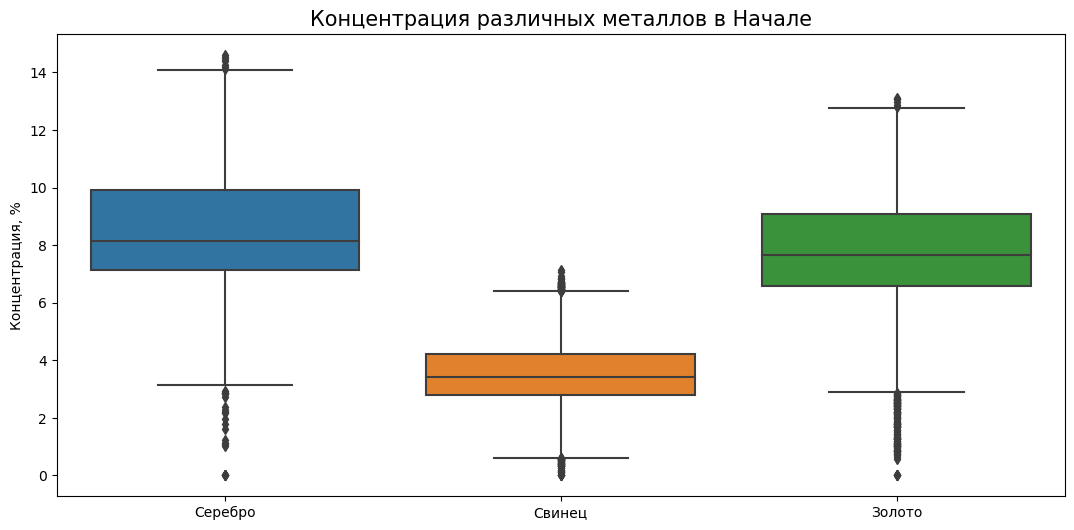

In [24]:
plt.figure(figsize=(13,6))
sns.boxplot(data=concetrates_feed)
plt.title('Концентрация различных металлов в Начале', fontsize=15)
plt.ylabel('Концентрация, %', fontsize=10)
plt.show()

**Флотация**

In [25]:
concetrates_rougher = pd.DataFrame()
concetrates_rougher['Серебро'] = train_df['rougher.output.concentrate_ag']
concetrates_rougher['Свинец'] = train_df['rougher.output.concentrate_pb']
concetrates_rougher['Золото'] = train_df['rougher.output.concentrate_au']

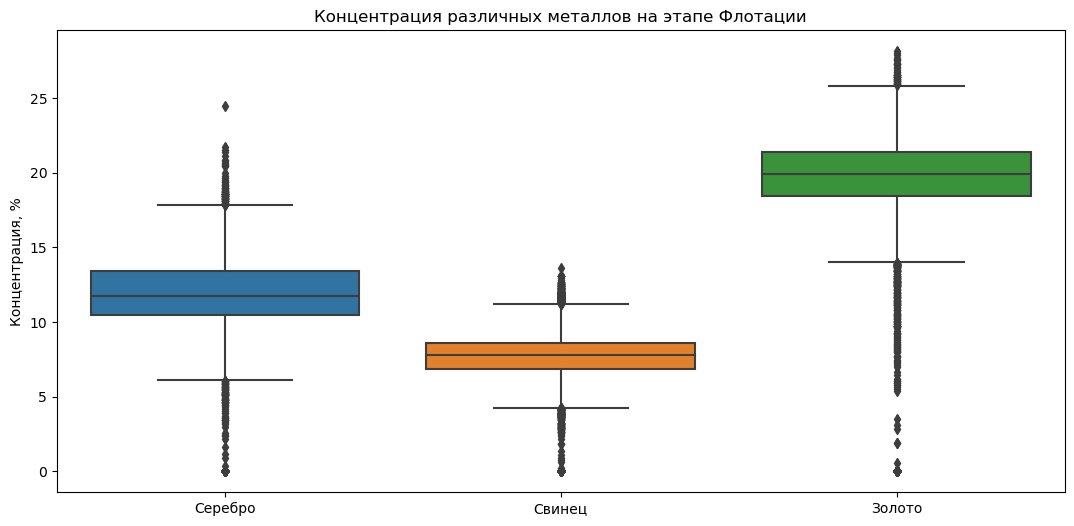

In [26]:
plt.figure(figsize=(13,6))
sns.boxplot(data=concetrates_rougher)
plt.title('Концентрация различных металлов на этапе Флотации')
plt.ylabel('Концентрация, %', fontsize=10)
plt.show()

**Первичная очистка**

In [27]:
concetrates_primary_cl = pd.DataFrame()
concetrates_primary_cl['Серебро'] = train_df['primary_cleaner.output.concentrate_ag']
concetrates_primary_cl['Свинец'] = train_df['primary_cleaner.output.concentrate_pb']
concetrates_primary_cl['Золото'] = train_df['primary_cleaner.output.concentrate_au']

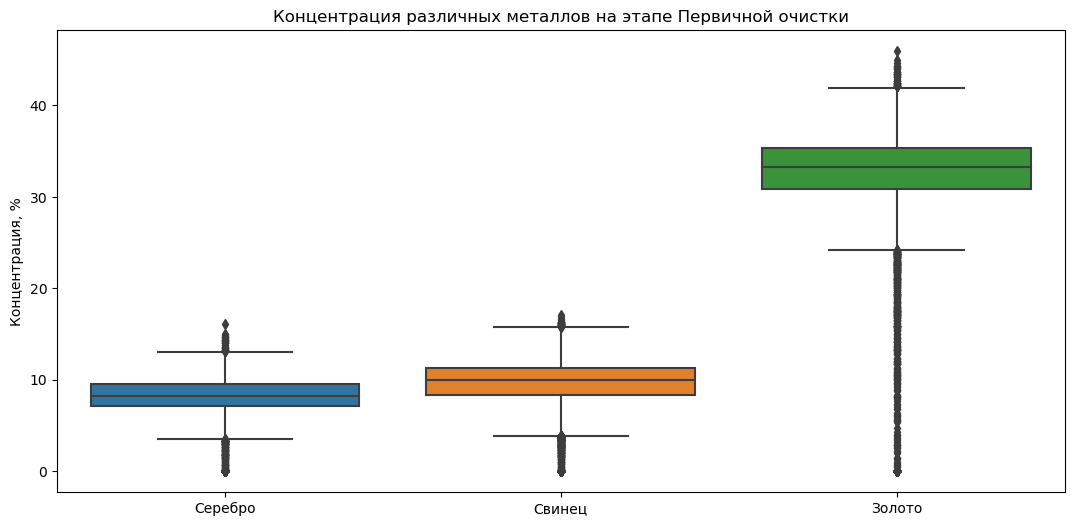

In [28]:
plt.figure(figsize=(13,6))
sns.boxplot(data=concetrates_primary_cl)
plt.title('Концентрация различных металлов на этапе Первичной очистки')
plt.ylabel('Концентрация, %', fontsize=10)
plt.show()

**Финальный концентрат**

In [29]:
concetrates_final = pd.DataFrame()
concetrates_final['Серебро'] = train_df['final.output.concentrate_ag']
concetrates_final['Свинец'] = train_df['final.output.concentrate_pb']
concetrates_final['Золото'] = train_df['final.output.concentrate_au']

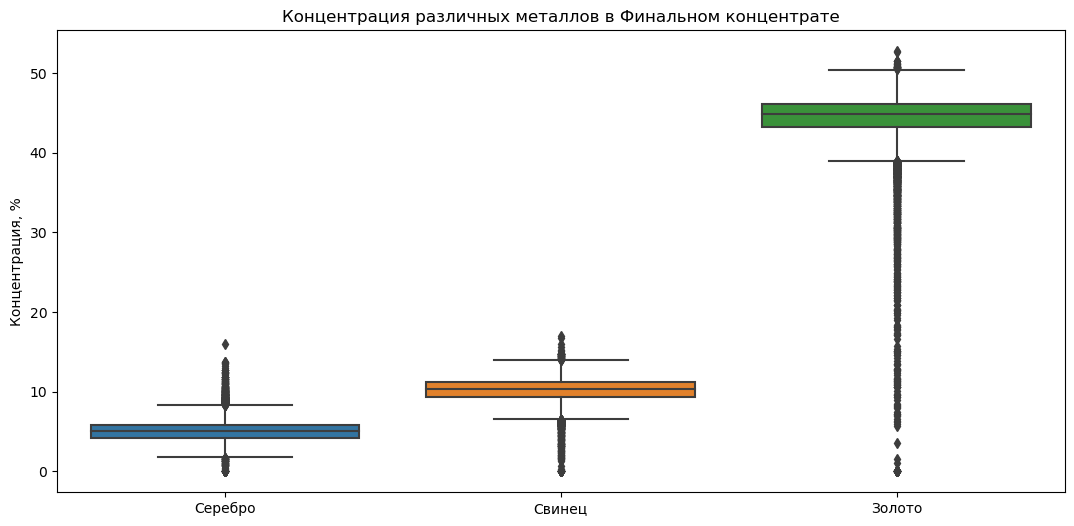

In [30]:
plt.figure(figsize=(13,6))
sns.boxplot(data=concetrates_final)
plt.title('Концентрация различных металлов в Финальном концентрате')
plt.ylabel('Концентрация, %', fontsize=10)
plt.show()

По графикам видно, что на каждом последующем этапе концентрация золота возрастала. 
Изначально медианное значения концентрации каждого металла было меньше 10%.
После флотации медианное значение концентрации золота было ~20%, но уже после первичной очистки стало >30%, а в конце находится окола 45%.
Концентрация Свинца повысилась после первичной очистки, однако почти не изменилось после вторичной.
Концентрация Серебра на повысилась после этапа флотации, однако после стала уменьшаться.

### Распределения размеров гранул сырья на обучающей и тестовой выборках

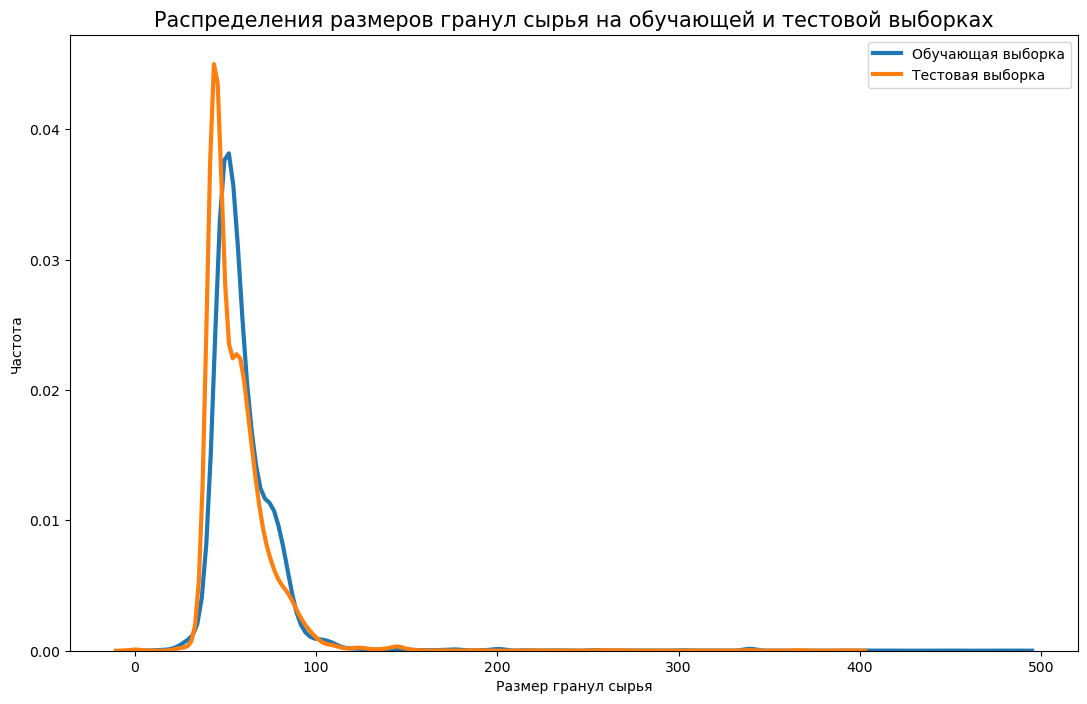

In [31]:
plt.figure(figsize=(13,8))
sns.distplot(train_df['rougher.input.feed_size'], hist = False, kde_kws = {'linewidth': 3}, label='Обучающая выборка')
sns.distplot(test_df['rougher.input.feed_size'], hist = False, kde_kws = {'linewidth': 3}, label='Тестовая выборка')
plt.title('Распределения размеров гранул сырья на обучающей и тестовой выборках', fontsize=15)
plt.xlabel('Размер гранул сырья', fontsize=10)
plt.ylabel('Частота', fontsize=10)
plt.legend(prop={'size': 10})
plt.show()

По графику видно, что распределение гранул сырья на выборках примерно одинаковое

### Суммарная концентрация всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах

In [32]:
rougher_inp = train_m['rougher.input.feed_ag'] + train_m['rougher.input.feed_pb']+\
                    train_m['rougher.input.feed_sol'] + train_m['rougher.input.feed_au']

rougher_out = train_m['rougher.output.concentrate_ag'] + train_m['rougher.output.concentrate_pb']+\
                    train_m['rougher.output.concentrate_sol'] + train_m['rougher.output.concentrate_au']

final = train_m['final.output.concentrate_ag'] + train_m['final.output.concentrate_pb']+\
                    train_m['final.output.concentrate_sol'] + train_m['final.output.concentrate_au']

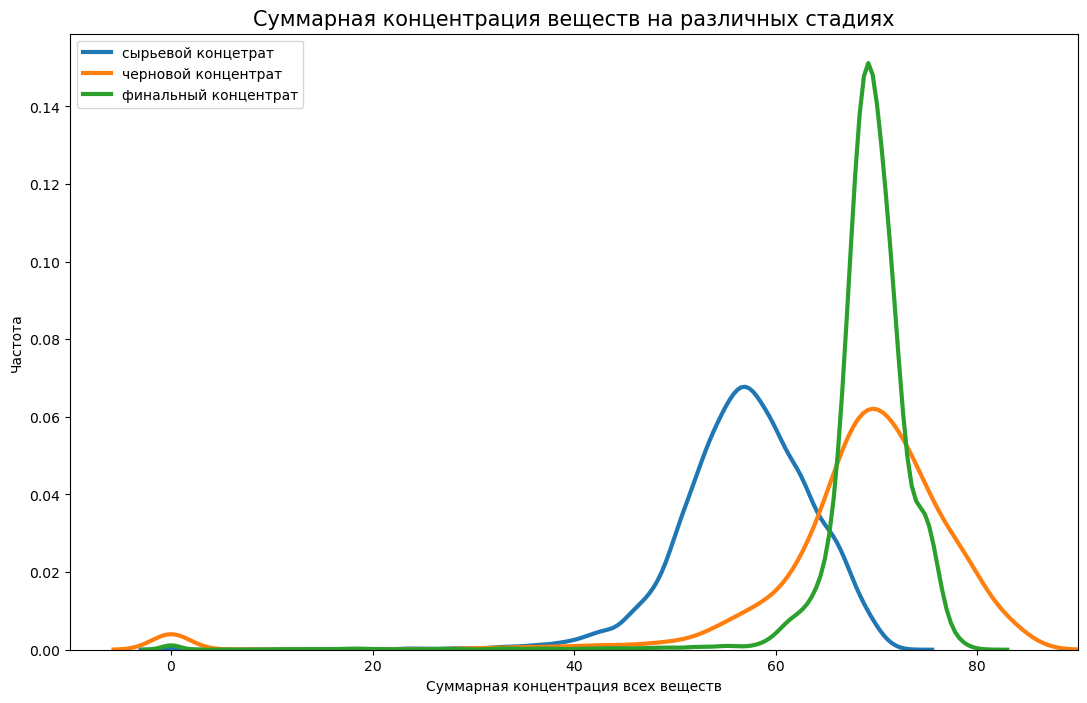

In [33]:
plt.figure(figsize=(13,8))
sns.distplot(rougher_inp, hist = False, kde_kws = {'linewidth': 3}, label='сырьевой концетрат')
sns.distplot(rougher_out, hist = False, kde_kws = {'linewidth': 3}, label='черновой концентрат')
sns.distplot(final, hist = False, kde_kws = {'linewidth': 3}, label='финальный концентрат')
plt.title('Суммарная концентрация веществ на различных стадиях', fontsize=15)
plt.xlabel('Суммарная концентрация всех веществ', fontsize=10)
plt.ylabel('Частота', fontsize=10)
plt.legend(prop={'size': 10})
plt.xlim((-10, 90))
plt.show()

In [34]:
concetrates_final = pd.DataFrame()
concetrates_final['Сырьевой концетрат'] = rougher_inp
concetrates_final['Черновой концетрат'] = rougher_out
concetrates_final['Финальный концетрат'] = final

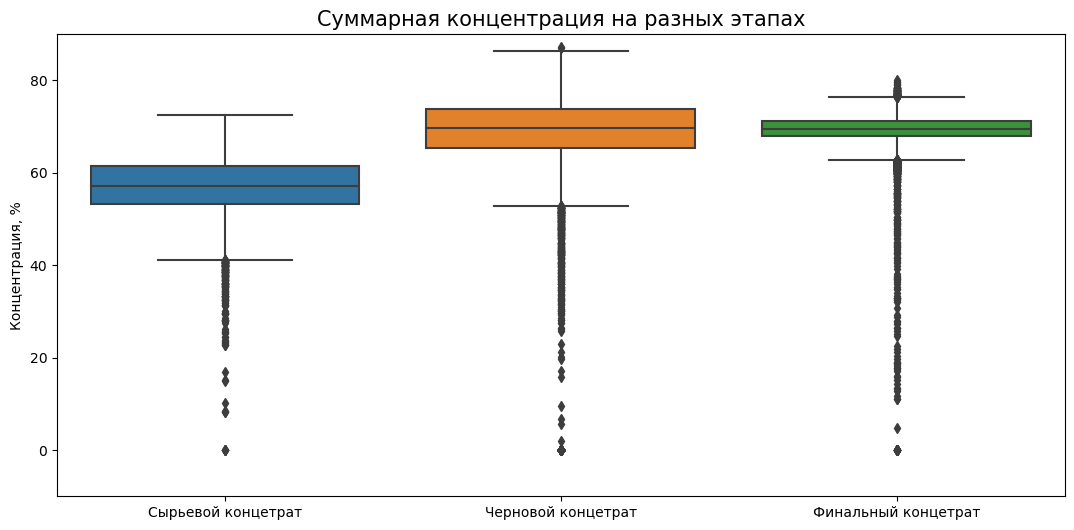

In [35]:
plt.figure(figsize=(13, 6))
sns.boxplot(data=concetrates_final)
plt.title('Суммарная концентрация на разных этапах', fontsize=15)
plt.ylabel('Концентрация, %', fontsize=10)
plt.ylim((-10, 90))
plt.show()

По графику видно, что суммарная концентрация в черном и финальном концентратах больше, чем в сырьевом, что очевидно. Также видно, что их медианное значение находится около 70. Кроме того, на графиках видно, что в данных очень много аномальных значений (таких как около нулевые). Это может негативно отразиться на модели. Избавимся от них, удалим значения меньше первого квартиля

In [36]:
steps = pd.DataFrame()
steps['rougher_inp'], steps['rougher_out'], steps['final'] = rougher_inp, rougher_out, final
train_d = train_m.loc[(steps['rougher_inp'] > 40) & (steps['rougher_out'] > 50) & (steps['final'] > 60)]
train_d.shape

(10288, 87)

In [37]:
rougher_inp = train_d['rougher.input.feed_ag'] + train_d['rougher.input.feed_pb']+\
                    train_d['rougher.input.feed_sol'] + train_d['rougher.input.feed_au']

rougher_out = train_d['rougher.output.concentrate_ag'] + train_d['rougher.output.concentrate_pb']+\
                    train_d['rougher.output.concentrate_sol'] + train_d['rougher.output.concentrate_au']

final = train_d['final.output.concentrate_ag'] + train_d['final.output.concentrate_pb']+\
                    train_d['final.output.concentrate_sol'] + train_d['final.output.concentrate_au']

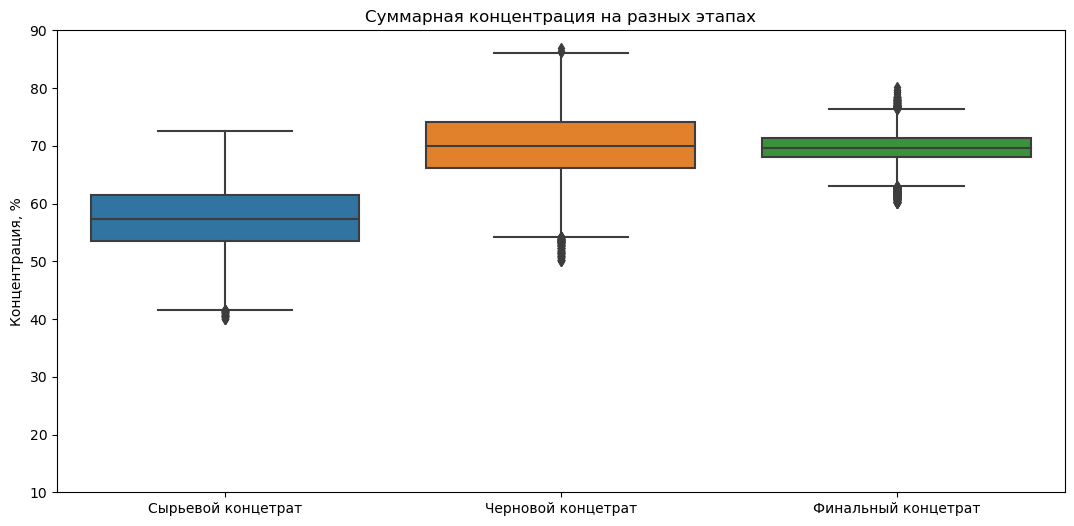

In [38]:
concetrates_final = pd.DataFrame()
concetrates_final['Сырьевой концетрат'] = rougher_inp
concetrates_final['Черновой концетрат'] = rougher_out
concetrates_final['Финальный концетрат'] = final

plt.figure(figsize=(13,6))
sns.boxplot(data=concetrates_final)
plt.title('Суммарная концентрация на разных этапах')
plt.ylabel('Концентрация, %', fontsize=10)
plt.ylim((10, 90))
plt.show()

Удалим также аномальные значения для выборки, где пропуски были заполнены

In [39]:
rougher_inp_2 = train_ffill['rougher.input.feed_ag'] + train_ffill['rougher.input.feed_pb']+\
                    train_ffill['rougher.input.feed_sol'] + train_ffill['rougher.input.feed_au']
rougher_out_2 = train_ffill['rougher.output.concentrate_ag'] + train_ffill['rougher.output.concentrate_pb']+\
                    train_ffill['rougher.output.concentrate_sol'] + train_ffill['rougher.output.concentrate_au']

final_2 = train_ffill['final.output.concentrate_ag'] + train_ffill['final.output.concentrate_pb']+\
                    train_ffill['final.output.concentrate_sol'] + train_ffill['final.output.concentrate_au']

In [40]:
steps_2 = pd.DataFrame()
steps_2['rougher_inp'], steps_2['rougher_out'], steps_2['final'] = rougher_inp_2, rougher_out_2, final_2
train_d2 = train_m.loc[(steps_2['rougher_inp'] > 40) & (steps_2['rougher_out'] > 50) & (steps_2['final'] > 60)]
train_d2.shape

(10288, 87)

In [41]:
train_d.equals(train_d2)

True

## Модель

### Функция подсчета итоговой sMAPE

In [42]:
def smape(target, predictions):
    predictions_rougher_rec = predictions[:, 0]
    target_rougher_rec = target.loc[:, 'rougher.output.recovery']
    predictions_final_rec = predictions[:, 1]
    target_final_rec = target.loc[:, 'final.output.recovery']
    
    rougher=np.sum(abs(target_rougher_rec-predictions_rougher_rec)/
                         ((abs(target_rougher_rec) + abs(predictions_rougher_rec)) / 2)) / len(target_rougher_rec) * 100
    
   
    final=np.sum(abs(target_final_rec - predictions_final_rec)/
                 ((abs(target_final_rec) + abs(predictions_final_rec)) / 2)) / len(target_final_rec) * 100

    return 0.25 * rougher + 0.75 * final


### Обучение моделей на выборках с удаленными пропусками и заполненными

#### Пропуски удалены

Подготовим признаки для обучения моделей. Отдели целевые признаки. Поскольку в тестовой выборке столбцовц меньше, чем в обучающей и исходной, то будем обучать модели на тех признаках, которые есть в тестовой выборке, чтобы не зашумлять данные.

In [43]:
target_1 = train_d[['rougher.output.recovery', 'final.output.recovery']]
train_1 = train_d[test_df.drop('date', axis=1).columns]

**LinearRegression**

In [44]:
lin_model = LinearRegression()
scores_cross_val = cross_val_score(lin_model, train_1, target_1, cv=4, scoring=make_scorer(smape))
print('Средняя оценка качества модели:', scores_cross_val.mean())

Средняя оценка качества модели: 9.220559207597631


**RandomForestRegressor**

In [45]:
max_depth = 0
estimators = 0
best_model_forest = None
best_score = 10000
for depth in range(1, 50, 10):
    for est in range(1, 10):
        forest_model = RandomForestRegressor(max_depth=depth,
                                             n_estimators=est,
                                             random_state=12345)
        forest_model.fit(train_1, target_1)
        scores_cross_val_mean = cross_val_score(forest_model,
                                                train_1,
                                                target_1,
                                                cv=4,
                                                scoring=make_scorer(smape)).mean()
        if best_score > scores_cross_val_mean:
            best_score = scores_cross_val_mean
            max_depth = depth
            estimators = est
            best_model_forest = forest_model
print(f'smape: {best_score}, max_depth: {max_depth}, estimators: {estimators}')

smape: 8.012412475754298, max_depth: 1, estimators: 9


#### Пропуски заполнены

Подготовим признаки для обучения моделей. Отдели целевые признаки. Поскольку в тестовой выборке столбцовц меньше, чем в обучающей и исходной, то будем обучать модели на тех признаках, которые есть в тестовой выборке, чтобы не зашумлять данные.

In [46]:
target_2 = train_d2[['rougher.output.recovery', 'final.output.recovery']]
train_2 = train_d2[test_df.drop('date', axis=1).columns]

**LinearRegression**

In [47]:
lin_model_2 = LinearRegression()
scores_cross_val = cross_val_score(lin_model_2, train_2, target_2, cv=4, scoring=make_scorer(smape))
print('Средняя оценка качества модели:', scores_cross_val.mean())

Средняя оценка качества модели: 9.220559207597631


**RandomForestRegressor**

In [48]:
max_depth = 0
estimators = 0
best_model_forest = None
best_score = 10000
for depth in range(1, 50, 10):
    for est in range(1, 10):
        forest_model = RandomForestRegressor(max_depth=depth,
                                             n_estimators=est,
                                             random_state=12345)
        forest_model.fit(train_2, target_2)
        scores_cross_val_mean = cross_val_score(forest_model,
                                                train_2,
                                                target_2,
                                                cv=4,
                                                scoring=make_scorer(smape)).mean()
        if best_score > scores_cross_val_mean:
            best_score = scores_cross_val_mean
            max_depth = depth
            estimators = est
            best_model_forest = forest_model
print(f'smape: {best_score}, max_depth: {max_depth}, estimators: {estimators}')

smape: 8.012412475754298, max_depth: 1, estimators: 9


### Тестирование модели

In [49]:
test = full_df.loc[full_df['date'].isin(test_df['date']), :].dropna()
target = test[['rougher.output.recovery','final.output.recovery']]
features = test[test_df.drop('date', axis=1).columns]

Лучше всего себя показала модель **Случайного леса**, обученная на данных, в которых пропуски были удалены. Проверим ее на тестовой выборке. Посчитаем sMAPE.

In [50]:
depth = 1
est = 9

In [51]:
forest_model = RandomForestRegressor(max_depth=depth,
                                     n_estimators=est,
                                     random_state=12345)
forest_model.fit(train_1, target_1)
pred = forest_model.predict(features)
print('sMAPE:', smape(target, pred))

sMAPE: 8.261697185256251


Посмотрим на значение sMAPE у DummyRegressor

In [52]:
regressor = DummyRegressor(strategy='mean')
regressor.fit(train_1, target_1)
pred = regressor.predict(features)
print('sMAPE:', smape(target, pred))

sMAPE: 8.633297044145898


Значение метрики sMAPE у модели **Случайного леса** немного лучше, чем у **DummyRegressor**, но нельзя сказать, что она хорошо обучена, поскольку разница с константной моделью минимальна

## Выводы

В процессе работы были изучены данные и подготовлены для обучения модели (подготовлены 2 выборки для обучения: 1. удалены пропуски из обучающей и исходной выборок и 2. Пропуски заполнены значениями, основанными на известных). Были проанализированы данные: сравнена концентрация различных металлов на каждом этапе, рассмотрено распределение размеров гранул сырья на обучающей выборке и сделан вывод о примерно одинаковом распределении.

После была обучена модель Линейной Регрессии и Случайного леса на разных выборках и посчитана метрика sMAPE для них. Лучшей на валидационных выборках себя показала модель Случайного леса, обученная на выборке, в которой были удалены пропуски, поэтому она и была протестирована. Значение метрики sMAPE на тестовой выборке для нее равно ~8.26